## Bloby's performance after thresholding intensity between noise and signal


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

Precision: 0.094
Recall: 0.094
<bound method BlobMetrics.precision of <bloby.BlobMetrics.BlobMetrics object at 0x11299b080>>


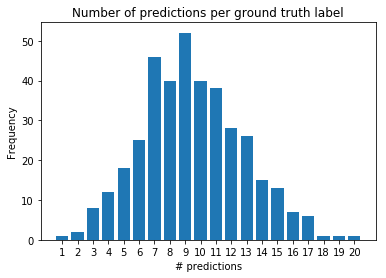

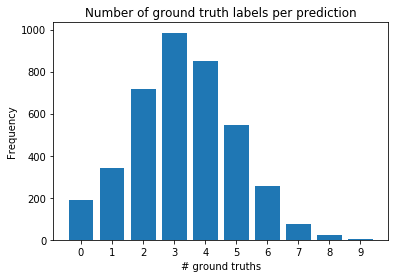

In [10]:
from bloby.BlobDetector import BlobDetector
from bloby.BlobMetrics import BlobMetrics
from bloby import util

input_tif_path = 'sample.tif' 
output_csv_path = 'sample_out.csv'
detector = BlobDetector(input_tif_path, n_components = 3, threshold = 5000)
centroids = detector.get_blob_centroids()
util.write_list_to_csv(centroids, output_csv_path)

ground_truth_path = 'sample.csv'
ground_truth = util.get_list_from_csv(ground_truth_path)
metrics = BlobMetrics(ground_truth, centroids)
print('Precision: {}\nRecall: {}'.format(metrics.precision(), metrics.recall()))

metrics.plot_predictions_per_ground_truth()
metrics.plot_ground_truths_per_prediction()

In [20]:
threshold = []
precision = []
recall = []
f1 = []
for th in range(5000, 25000, 500):
    print('threshold value=', th)
    detector = BlobDetector(input_tif_path, n_components=3, threshold=th)
    centroids = detector.get_blob_centroids()
    util.write_list_to_csv(centroids, output_csv_path)

    ground_truth_path = 'sample.csv'
    ground_truth = util.get_list_from_csv(ground_truth_path)

    metrics = BlobMetrics(ground_truth, centroids)
    print('Precision: {}\nRecall: {}'.format(metrics.precision(), metrics.recall()))
    precision.append(metrics.precision())
    recall.append(metrics.recall())
    f1_calc = (2*metrics.precision()*metrics.recall())/(metrics.precision() + metrics.recall())
    f1.append(f1_calc)
    threshold.append(th)

print('Threshold list:', threshold, "\nPrecision list:", precision, "\nRecall list:", recall, "\nF1 list:", f1)

threshold value= 5000
Precision: 0.094
Recall: 0.094
threshold value= 5500
Precision: 0.097
Recall: 0.097
threshold value= 6000
Precision: 0.103
Recall: 0.103
threshold value= 6500
Precision: 0.108
Recall: 0.109
threshold value= 7000
Precision: 0.116
Recall: 0.116
threshold value= 7500
Precision: 0.124
Recall: 0.124
threshold value= 8000
Precision: 0.132
Recall: 0.132
threshold value= 8500
Precision: 0.141
Recall: 0.141
threshold value= 9000
Precision: 0.152
Recall: 0.153
threshold value= 9500
Precision: 0.164
Recall: 0.165
threshold value= 10000
Precision: 0.177
Recall: 0.178
threshold value= 10500
Precision: 0.192
Recall: 0.194
threshold value= 11000
Precision: 0.206
Recall: 0.208
threshold value= 11500
Precision: 0.226
Recall: 0.228
threshold value= 12000
Precision: 0.24
Recall: 0.243
threshold value= 12500
Precision: 0.254
Recall: 0.259
threshold value= 13000
Precision: 0.277
Recall: 0.285
threshold value= 13500
Precision: 0.293
Recall: 0.305
threshold value= 14000
Precision: 0.311

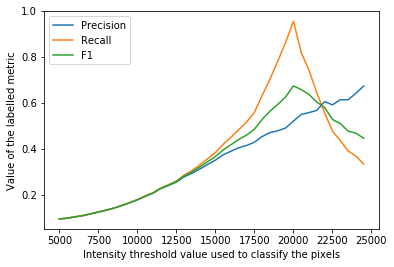

In [27]:
## Plots of F1 meaaures and threshold values:

plt.plot(threshold, precision)
plt.plot(threshold, recall)
plt.plot(threshold, f1)
plt.xlabel('Intensity threshold value used to classify the pixels')
plt.ylabel('Value of the labelled metric')

plt.legend(['Precision', 'Recall', 'F1'], loc='upper left')

plt.show()